In [7]:
import random
import time
from matplotlib import pyplot

print('Modules imported successfully!')

Modules imported successfully!


In [23]:
def get_random_square(available_squares):
    
    choice = random.choice(available_squares)

    
    return choice

In [24]:
random.seed(10)

assert get_random_square([0]) == 0
assert get_random_square([0, 1, 2]) == 1
assert get_random_square(range(8)) == 7
print('Code tested successfully.')

random.seed()  # Reset the seed.

Code tested successfully.


In [25]:
def initialize_chessboard(size = 8):
    
    chessboard = [
         [0 for _ in range(size)] for _ in range(size)
    ]
    

    return chessboard

In [26]:
def get_available_squares(row, chessboard):
    
    size = len(chessboard)
    available_squares = list(range(size))  # We will start by assuming that
                                           # all squares of the row are
                                           # available.
    
    for current_row in range(row):
        queens_in_row = [
            i for i in range(size) if chessboard[current_row][i] == 1
        ]
        
        # We should expect 'queens_in_row' to contain only one item: the column
        # at which a queen was placed, in the referenced row. We will now use
        # the referenced column to remove that same column index from the list
        # of 'available_squares', as well as the corresponding diagonals. Use
        # the 'remove' method to delete items from 'available_squares' but keep
        # in mind that you have to check if those items are in the list
        # beforehand, or the removal may raise an exception.
        
        for queen_column in queens_in_row:
            
            # Avoid the program from placing a queen in the same column.

            if queen_column in available_squares:
                available_squares.remove(queen_column)
            
 
            
            # Avoid the program from placing a queen in the first diagonal.
            # E.g: If the queen was at (1, 3), and row==4, a new cannot be
            # placed at (4, 6), so the item to be removed from
            # 'available_squares' would be 6.
  
            intersection_first_diagonal = queen_column + (row - current_row)
            if intersection_first_diagonal in available_squares:
                available_squares.remove(intersection_first_diagonal)
            

            
            # Avoid the program from placing a queen in the second diagonal.
            # E.g: If the queen was at (1, 3), and row==4, a new cannot be
            # placed at (4, 0), so the item to be removed from
            # 'available_squares' would be 0.

            intersection_second_diagonal = queen_column - (row - current_row)
            if intersection_second_diagonal in available_squares:
                available_squares.remove(intersection_second_diagonal)


    
    return available_squares

In [27]:
def get_queens_problem_solution(size = 8, time_limit = -1):
    
    chessboard = initialize_chessboard(size)

    row = 0
    abort_solution = False
    while row < size \
            and not abort_solution \
            and (time_limit == -1 or time.time() < time_limit):
        
        available_squares = get_available_squares(row, chessboard)
        
        if len(available_squares) == 0:
             abort_solution = True
                
        else:
            choice = get_random_square(available_squares)
            chessboard[row][choice] = 1 


        row += 1
        
    if abort_solution is True \
            or (time_limit != -1 and time.time() > time_limit):
        raise Exception('A solution could not be found.')
        
    return chessboard

In [28]:
def queens_problem_lasvegas(seconds, size = 8):
    
    result = None
    
    time_limit = time.time() + seconds
    
    while result is None and time.time() < time_limit:
        
        try:
            result = get_queens_problem_solution(size, time_limit)
        except Exception:
            # If a solution could not be found, just ignore the exception
            # and try again.
            pass
    
    if result is None:
        raise Exception('A solution could not be found in time.')
        
    return result

You may use the following assertion clauses to check if your code is working properly. Once again, we will use a random seed temporarily to be able to check the results deterministically.

In [29]:
random.seed(10)

assert queens_problem_lasvegas(1) == [
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0]
]

print('Code tested successfully.')

random.seed()

Code tested successfully.


The following function is provided in order to visualize any given solution. It will be used afterwards.

In [30]:
def draw_solution(solution):
    
    size = len(solution)
    
    blank_chessboard = [
        [
            1 if (row - column) % 2 == 1 else 0
            for column in range(size)
        ] for row in range(size)
    ]
    pyplot.imshow(blank_chessboard, cmap='binary')

    for row in range(size):
        for column in range(size):
            if solution[row][column] == 1:
                pyplot.text(
                    row,
                    column,
                    '♕',
                    fontsize=25,
                    ha='center',
                    va='center',
                    color='black' if (row - column) % 2 == 0 else 'white'
                )
    
    pyplot.show()

The next example uses a chessboard of size 8, that runs in way less than the given time (0.01 seconds), and should be able to run always without error.

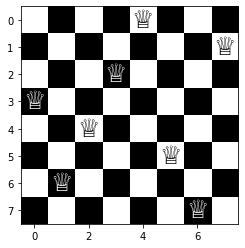

In [31]:
draw_solution(queens_problem_lasvegas(0.01))

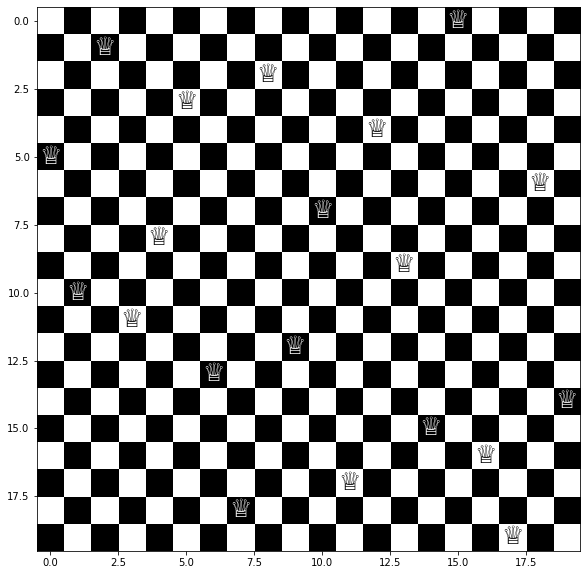

In [33]:
pyplot.figure(figsize=(10, 10))
draw_solution(queens_problem_lasvegas(0.02, size=20))

[Back to the top](#top)

## Quantum Approach

In [31]:
from qiskit.algorithms import QAOA
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer

from qiskit import Aer
from qiskit.utils import QuantumInstance

# # Note: These are the replacements of the aqua package.
# from qiskit.utils import algorithm_globals, QuantumInstance
# from qiskit.algorithms import QAOA


def solve(Q):
    qp = QuadraticProgram()
    [qp.binary_var() for _ in range(Q.shape[0])]
    qp.minimize(quadratic=Q)

    quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'))
    qaoa_mes = QAOA(quantum_instance=quantum_instance)
    qaoa = MinimumEigenOptimizer(qaoa_mes)
    qaoa_result = qaoa.solve(qp)
    return [qaoa_result.x], [qaoa_result.fval]

In [32]:
test = ''' OPENQASM 2.0;
include "qelib1.inc";

qreg qr[25];
creg cr[25];


h qr[0];
h qr[3];
h qr[4];
h qr[7];
h qr[8];
h qr[11];
h qr[12];
h qr[15];

x qr[19];
x qr[20];
x qr[21];
x qr[22];
x qr[23];
x qr[24];
x qr[0];
x qr[3];
x qr[4];
x qr[7];
x qr[8];
x qr[11];
x qr[12];
x qr[15];

ccx qr[0],qr[3],qr[1];
ccx qr[4],qr[7],qr[5];
ccx qr[8],qr[11],qr[9];
ccx qr[12],qr[15],qr[13];

x qr[0];
x qr[3];
x qr[4];
x qr[7];
x qr[8];
x qr[11];
x qr[12];
x qr[15];

ccx qr[0],qr[3],qr[2];
ccx qr[4],qr[7],qr[6];
ccx qr[8],qr[11],qr[10];
ccx qr[12],qr[15],qr[14];

cx qr[2],qr[0];
cx qr[2],qr[3];
cx qr[6],qr[4];
cx qr[6],qr[7];
cx qr[10],qr[8];
cx qr[10],qr[11];
cx qr[14],qr[12];
cx qr[14],qr[15];


h qr[16];
h qr[17];
h qr[18];

cu1(3.14159265358979) qr[16],qr[0];
cu1(3.14159265358979) qr[16],qr[4];
cu1(3.14159265358979) qr[16],qr[8];
cu1(3.14159265358979) qr[16],qr[12];
cu1(3.14159265358979) qr[17],qr[1];
cu1(3.14159265358979) qr[17],qr[5];
cu1(3.14159265358979) qr[17],qr[9];
cu1(3.14159265358979) qr[17],qr[13];
cu1(3.14159265358979) qr[18],qr[2];
cu1(3.14159265358979) qr[18],qr[6];
cu1(3.14159265358979) qr[18],qr[10];
cu1(3.14159265358979) qr[18],qr[14];


h qr[16];
h qr[17];
h qr[18];

ccx qr[0],qr[5],qr[19];
ccx qr[1],qr[4],qr[19];
ccx qr[1],qr[6],qr[19];
ccx qr[2],qr[5],qr[19];
ccx qr[2],qr[7],qr[19];
ccx qr[3],qr[6],qr[19];

ccx qr[0],qr[10],qr[20];
ccx qr[1],qr[11],qr[20];
ccx qr[2],qr[8],qr[20];
ccx qr[3],qr[9],qr[20];

ccx qr[0],qr[15],qr[21];
ccx qr[3],qr[12],qr[21];

ccx qr[4],qr[9],qr[22];
ccx qr[5],qr[8],qr[22];
ccx qr[5],qr[10],qr[22];
ccx qr[6],qr[9],qr[22];
ccx qr[6],qr[11],qr[22];
ccx qr[7],qr[10],qr[22];

ccx qr[4],qr[14],qr[23];
ccx qr[5],qr[15],qr[23];
ccx qr[6],qr[12],qr[23];
ccx qr[7],qr[13],qr[23];

ccx qr[8],qr[13],qr[24];
ccx qr[9],qr[12],qr[24];
ccx qr[9],qr[14],qr[24];
ccx qr[10],qr[13],qr[24];
ccx qr[10],qr[15],qr[24];
ccx qr[11],qr[14],qr[24];

measure qr[0] -> cr[24];
measure qr[1] -> cr[23];
measure qr[2] -> cr[22];
measure qr[3] -> cr[21];
measure qr[4] -> cr[20];
measure qr[5] -> cr[19];
measure qr[6] -> cr[18];
measure qr[7] -> cr[17];
measure qr[8] -> cr[16];
measure qr[9] -> cr[15];
measure qr[10] -> cr[14];
measure qr[11] -> cr[13];
measure qr[12] -> cr[12];
measure qr[13] -> cr[11];
measure qr[14] -> cr[10];
measure qr[15] -> cr[9];
measure qr[16] -> cr[8];
measure qr[17] -> cr[7];
measure qr[18] -> cr[6];
measure qr[19] -> cr[5];
measure qr[20] -> cr[4];
measure qr[21] -> cr[3];
measure qr[22] -> cr[2];
measure qr[23] -> cr[1];
measure qr[24] -> cr[0];



'''
from qiskit import QuantumCircuit
qc = QuantumCircuit.from_qasm_str(test)

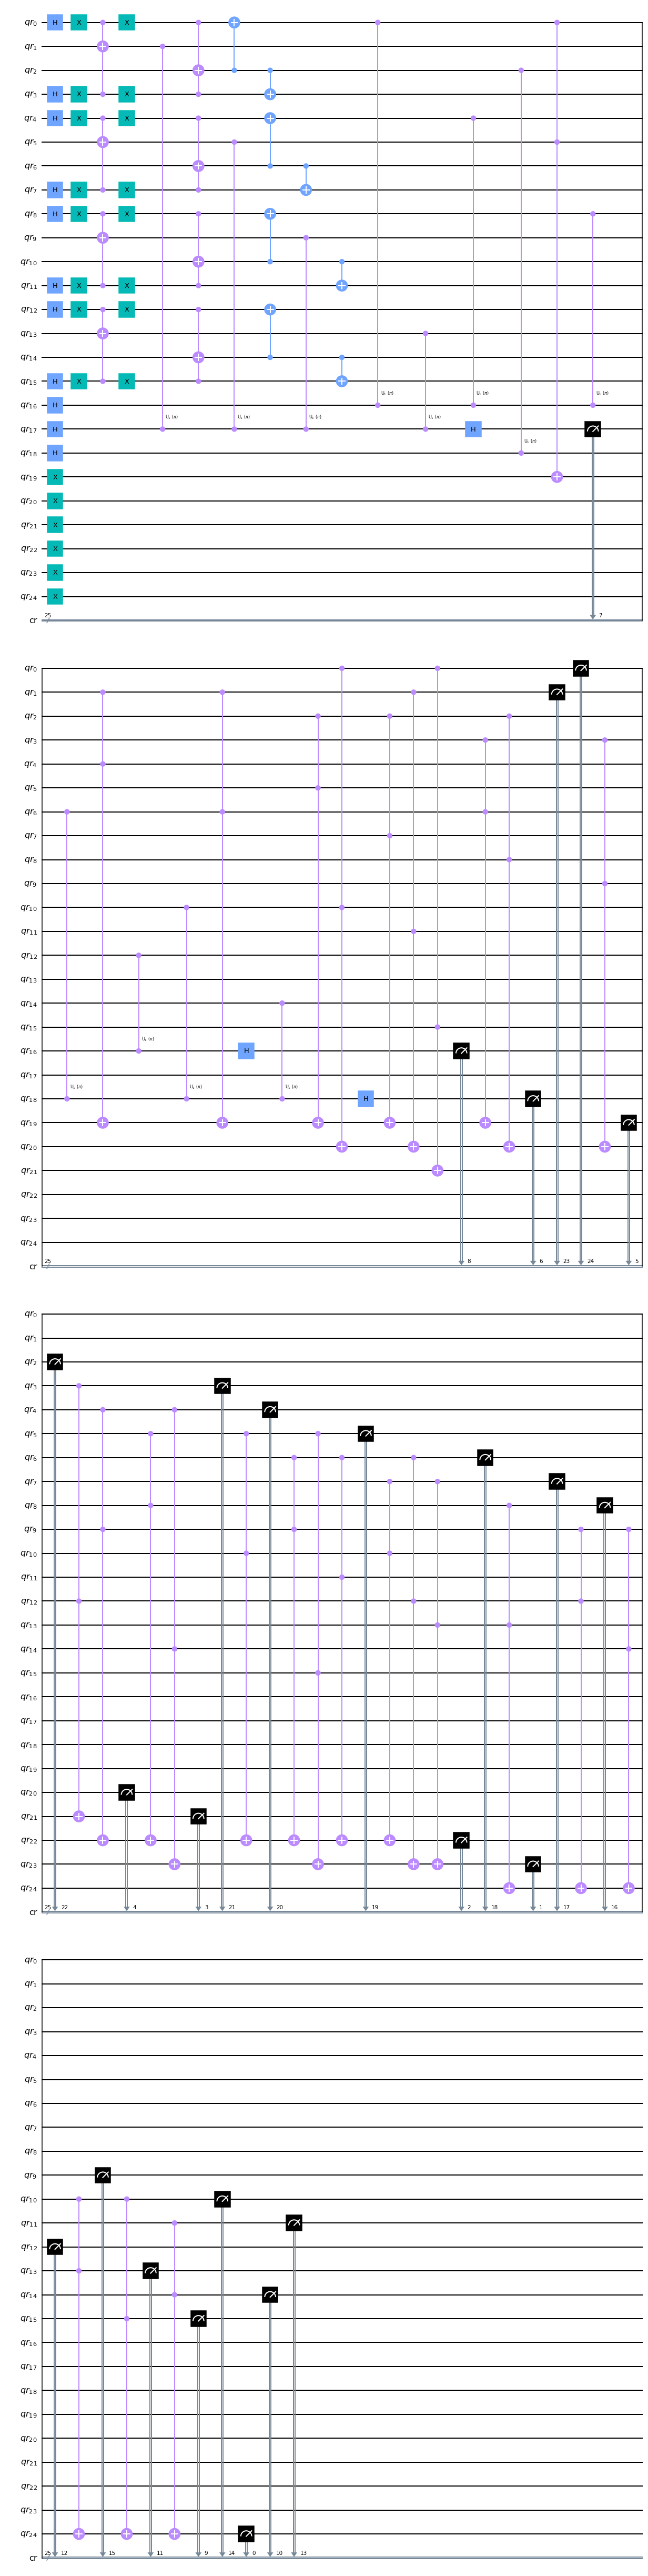

In [34]:
qc.draw('mpl')

In [169]:
from qiskit import *
from qiskit.quantum_info import Operator
from qiskit.compiler import transpile

In [170]:
from qiskit.providers.aer import AerSimulator
simulator = AerSimulator(method='matrix_product_state', enable_truncation=True) # we can try this or the extended stabilizer
tcirc = transpile(qc, simulator, optimization_level=3)

extended_stabilizer_simulator = AerSimulator(method='extended_stabilizer')



result = simulator.run(tcirc, shots=2000, memory=True).result()
memory = result.get_memory(tcirc)
counts = result.get_counts()

sorted_keys = sorted(counts, key=counts.get, reverse=True)

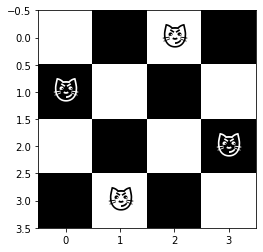

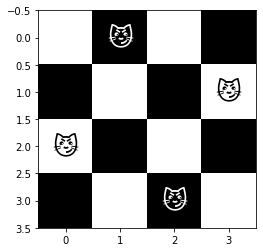

In [171]:
import numpy as np

a =[]

aci_target = "111111111"
for line in sorted_keys:
    if aci_target in line:
        d = line[0:16]
        #print(d)
        a.append(d)

    
#print(a)



for i in range(len(a)):
    d_list = []
    c = a[i]
    #print(c)
    for j in range(16):
        d_list.append(int(c[j]))
    #print(d_list)
    answer = np.reshape(d_list, (4, 4)) 
    draw_solution(answer)


